In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import gseapy as gp
import pdb
import copy
from scipy import sparse
import anndata
import cerberus

p = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [7]:
ca = cerberus.read('cerberus_annot_triplets.h5')

In [8]:
ca.triplets.source.unique()

array(['lapa', 'v40', 'gtex', 'v29', 'all', 'obs_det', 'sample_det',
       'obs_major', 'sample_major', 'obs_mm_det', 'obs_mm_major'],
      dtype=object)

In [9]:
# mouse match stuff
c_dict, order = get_biosample_colors()
c_dict[np.nan] = 'k'

mm_tissues = get_mouse_match_samples
mm_tissues+= np.nan
mmap = {'v40': '*', 'v29': 'x', 'obs_mm_det': '^', 'cerberus': '2'}
subset = {'source': ['v40', 'obs_mm_det', 'sample_det']}

# can't subset the way that I want because I want to use and and or logic...
ca.triplets = ca.triplets.loc[ca.triplets.source.isin(subset['source'])]
ca.triplets = ca.triplets.loc[ca.triplets['sample'].isin(mm_tissues)]

0.4
12.0
(2.1431999999999998, 2.0)


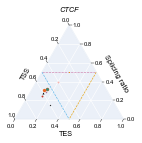

In [10]:
# Ctcf
df = ca.plot_simplex(top='splicing_ratio', 
            gene='CTCF',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            jitter=True,
            legend=False,
            subset=subset,
            size_scale=0.2,
            order_marker_sizes=True,
            fname='figures/simplex_ctcf_mm.pdf')

0.4
12.0
(2.1431999999999998, 2.0)


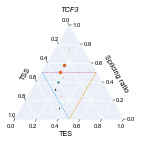

In [11]:
# Tcf3
df = ca.plot_simplex(top='splicing_ratio', 
            gene='TCF3',
            hue='sample',
            cmap=c_dict,
            size='gene_tpm', 
            log_size=True,
            sectors=True,
            marker_style='source',
            mmap=mmap,
            jitter=True,
            legend=False,
            subset=subset,
            size_scale=0.2,
            order_marker_sizes=True,
            fname='figures/simplex_tcf3_mm.pdf')